In [15]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import re

WW_trends = json.loads(open('WWTrends.json').read())
US_trends = json.loads(open('USTrends.json').read()) 

print("WW trends:", json.dumps(WW_trends, indent = 1))
print("\n", "US trends:", json.dumps(US_trends, indent = 1))

WW trends: [
 {
  "trends": [
   {
    "name": "#BeratKandili",
    "url": "http://twitter.com/search?q=%23BeratKandili",
    "promoted_content": null,
    "query": "%23BeratKandili",
    "tweet_volume": 46373
   },
   {
    "name": "#GoodFriday",
    "url": "http://twitter.com/search?q=%23GoodFriday",
    "promoted_content": null,
    "query": "%23GoodFriday",
    "tweet_volume": 81891
   },
   {
    "name": "#WeLoveTheEarth",
    "url": "http://twitter.com/search?q=%23WeLoveTheEarth",
    "promoted_content": null,
    "query": "%23WeLoveTheEarth",
    "tweet_volume": 159698
   },
   {
    "name": "#195TLdenTTVerilir",
    "url": "http://twitter.com/search?q=%23195TLdenTTVerilir",
    "promoted_content": null,
    "query": "%23195TLdenTTVerilir",
    "tweet_volume": null
   },
   {
    "name": "#AFLNorthDons",
    "url": "http://twitter.com/search?q=%23AFLNorthDons",
    "promoted_content": null,
    "query": "%23AFLNorthDons",
    "tweet_volume": null
   },
   {
    "name": "Shiv Sen

In [4]:
# Find the common trends
world_trends = set([trend['name'] 
                    for trend in WW_trends[0]['trends']])

us_trends = set([trend['name'] 
                 for trend in US_trends[0]['trends']]) 

common_trends = world_trends.intersection(us_trends)

print(world_trends, "\n")
print(us_trends, "\n")
print (len(common_trends), "common trends:", common_trends)

{'#Karfreitag', '#DinahJane1', '#ViernesSanto', 'プリウス', '#DuyguAsena', '東京・池袋衝突事故', '#يوم_الجمعه', '#NRLBulldogsSouths', '#NikahUmurBerapa', '重体の女性と女児', '#HardikPatel', '#ProtestoEdiyorum', '#ConCalmaRemix', '#اغلاق_BBM', '#HayırlıKandiller', '池袋の事故', '高齢者', '#HayırlıCumalar', 'örgütdeğil arkadaşgrubu', '刀ステ', '#TheJudasInMyLife', '#Jersey', '#BeratKandili', '#DragRace', '#Ontas', 'Hemant Karkare', 'グレア', '#JunquerasACN', 'Derry', 'Shiv Sena', '#19aprile', 'Lil Dicky', '#HanumanJayanti', '#KpuJanganCurang', '#CHIvLIO', '#GoodFriday', 'Derrick White', '#IndonesianElectionHeroes', '#BLACKPINKxCorden', 'Berat Kandilimiz', '#WeLoveTheEarth', '十二国記', 'Priyanka Chaturvedi', 'Lyra McKee', '#195TLdenTTVerilir', '歩行者', '免許返納', '#ShivSena', '브이알', '#AFLNorthDons'} 

{'#AFLNorthDons', '"Earth"', '#DinahJane1', '#TheLegendOfVoxMachina', '#MyInnerDemonSaid', '#WeirdDateStories', 'George Conway', '#DontChangeOutNow', 'Kazuo Koike', '#NRLBulldogsSouths', '#Earth', '#GossipShouldBe', '#ConCalmaRemix',

In [5]:
# Load the data
tweets = json.loads(open('WeLoveTheEarth.json').read())

tweets[0:2]

[{'created_at': 'Fri Apr 19 08:46:48 +0000 2019',
  'id': 1119160405270523904,
  'id_str': '1119160405270523904',
  'text': 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'WeLoveTheEarth', 'indices': [30, 45]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'lildickytweets',
     'name': 'LD',
     'id': 1209516660,
     'id_str': '1209516660',
     'indices': [3, 18]}],
   'urls': [{'url': 'https://t.co/L22XsoT5P1',
     'expanded_url': 'https://youtu.be/pvuN_WvF1to',
     'display_url': 'youtu.be/pvuN_WvF1to',
     'indices': [46, 69]}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 212

In [6]:
# Extract the information about #WeLoveTheEarth
texts = [tweet['text'] 
             for tweet in tweets]

names = [user_mention['screen_name'] 
             for tweet in tweets 
                 for user_mention in tweet['entities']['user_mentions']]

hashtags = [hashtag['text']
               for tweet in tweets
                   for hashtag in tweet['entities']['hashtags']]

print (json.dumps(texts[0:10], indent=1),"\n")
print (json.dumps(names[0:10], indent=1),"\n")
print (json.dumps(hashtags[0:10], indent=1),"\n")

[
 "RT @lildickytweets: \ud83c\udf0e out now #WeLoveTheEarth https://t.co/L22XsoT5P1",
 "\ud83d\udc9a\ud83c\udf0e\ud83d\udc9a  #WeLoveTheEarth \ud83d\udc47\ud83c\udffc",
 "RT @cabeyoomoon: Ta piosenka to bop,  wpada w ucho  i dochody z niej id\u0105 na dobry cel,  warto s\u0142ucha\u0107 w k\u00f3\u0142ko i w k\u00f3\u0142ko gdziekolwiek si\u0119 ty\u2026",
 "#WeLoveTheEarth \nCzemu ja si\u0119 pop\u0142aka\u0142am",
 "RT @Spotify: This is epic. @lildickytweets got @justinbieber, @arianagrande, @halsey, @sanbenito, @edsheeran, @SnoopDogg, @ShawnMendes, @Kr\u2026",
 "RT @biebercentineo: Justin : are we gonna die? \nLil dicky: you know bieber we might die \n\nBTCH IM CRYING #EARTH #WeLoveTheEarth #WELOVEEART\u2026",
 "RT @dreamsiinflate: #WeLoveTheEarth \u201ci am a fat fucking pig\u201d okay brendon urie https://t.co/FdJmq31xZc",
 "Literally no one:\n\nMe in the past 4 hours:\n\nI'm a koala and I sleep all the time, so what, it's cute \ud83c\udfb6\n\n#WeLoveTheEarth #EdSheeranTheKoala",

In [8]:
# Frequency analysis
for item in [names, hashtags]:
    c = Counter(item) 
    print (c.most_common(10), "\n")

[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



In [10]:
# Information of retweets
retweets = [ (tweet['retweet_count'], 
              tweet['retweeted_status']['favorite_count'],
              tweet['retweeted_status']['user']['followers_count'],
              tweet['retweeted_status']['user']['screen_name'],
              tweet['text']) 
            for tweet in tweets if 'retweeted_status' in tweet
           ]

df = pd.DataFrame(
    retweets, 
    columns=['Retweets','Favorites','Followers','ScreenName','Text']).groupby(
    ['ScreenName','Text','Followers']).sum().sort_values(by=['Followers'], ascending=False)

df.style.background_gradient()

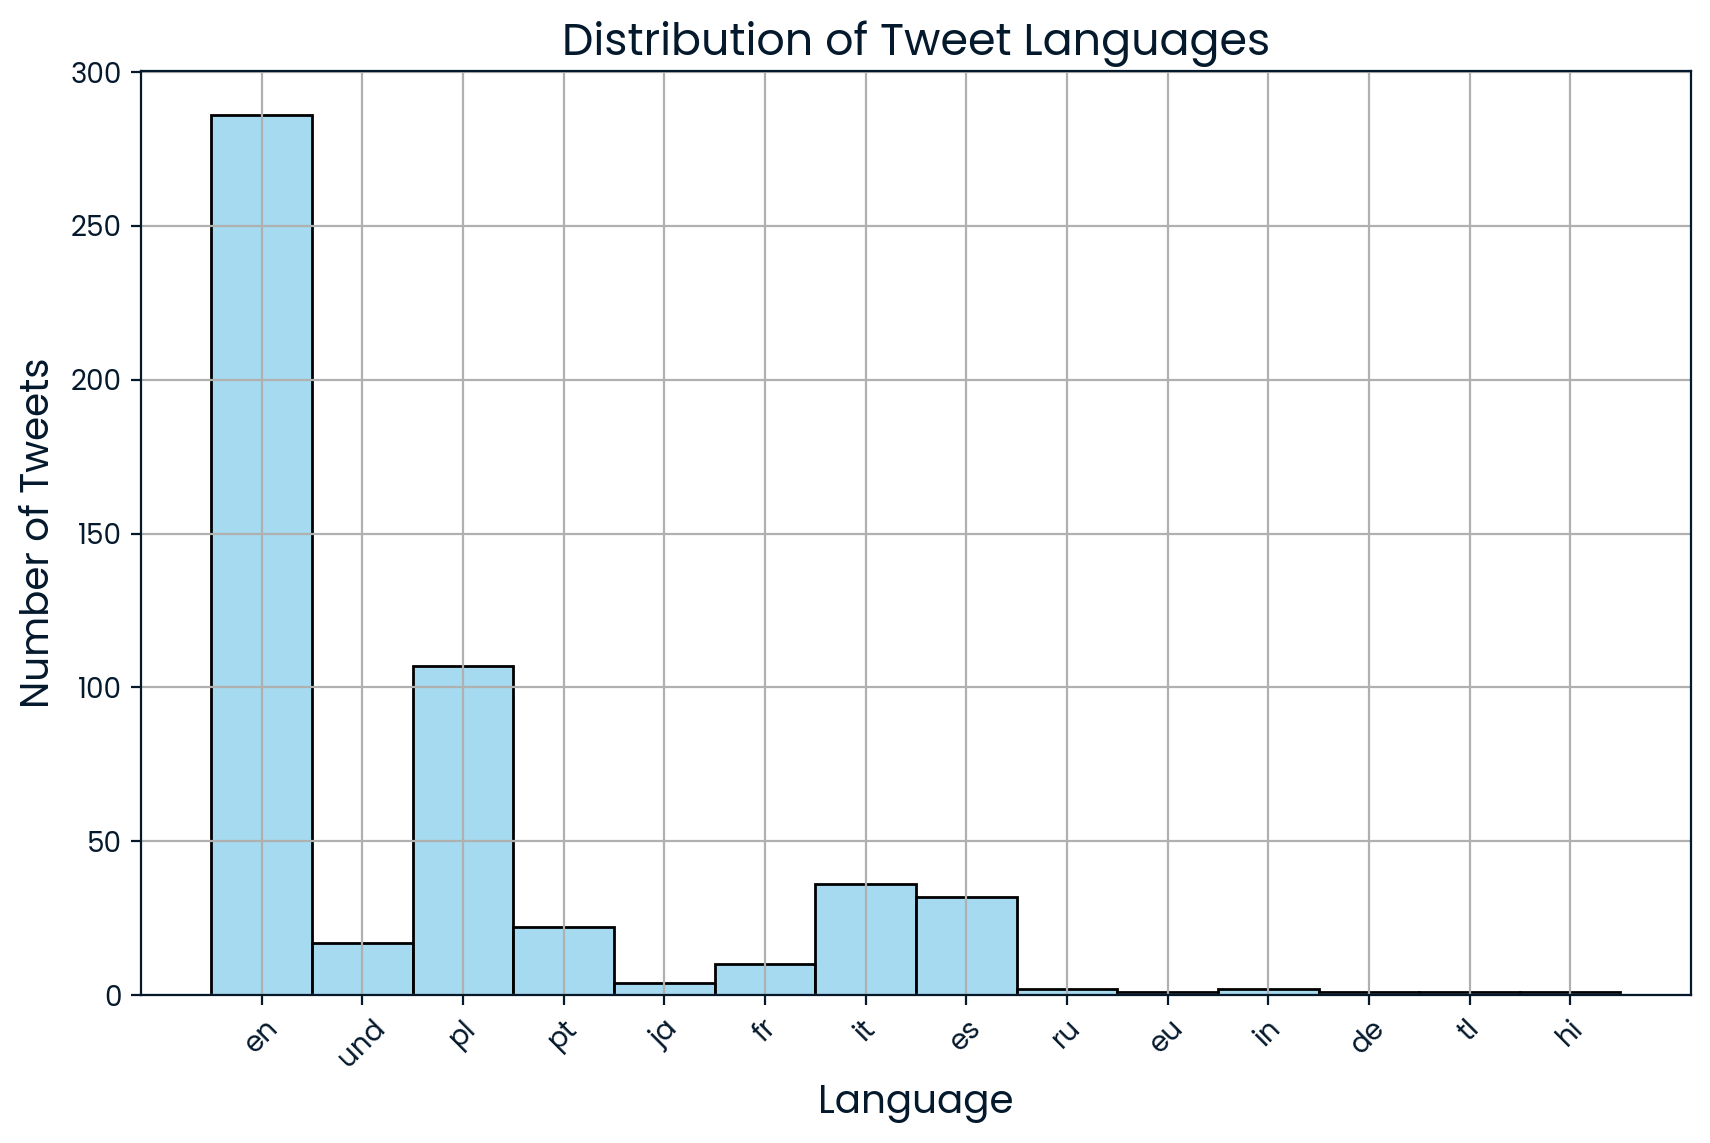

In [13]:
# The used languages on tweet
tweets_languages = []
for tweet in tweets: 
    tweets_languages.append(tweet['lang'])

plt.figure(figsize=(10, 6))
sns.histplot(tweets_languages, kde=False, color='skyblue', edgecolor='black', bins=30)
plt.title('Distribution of Tweet Languages', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

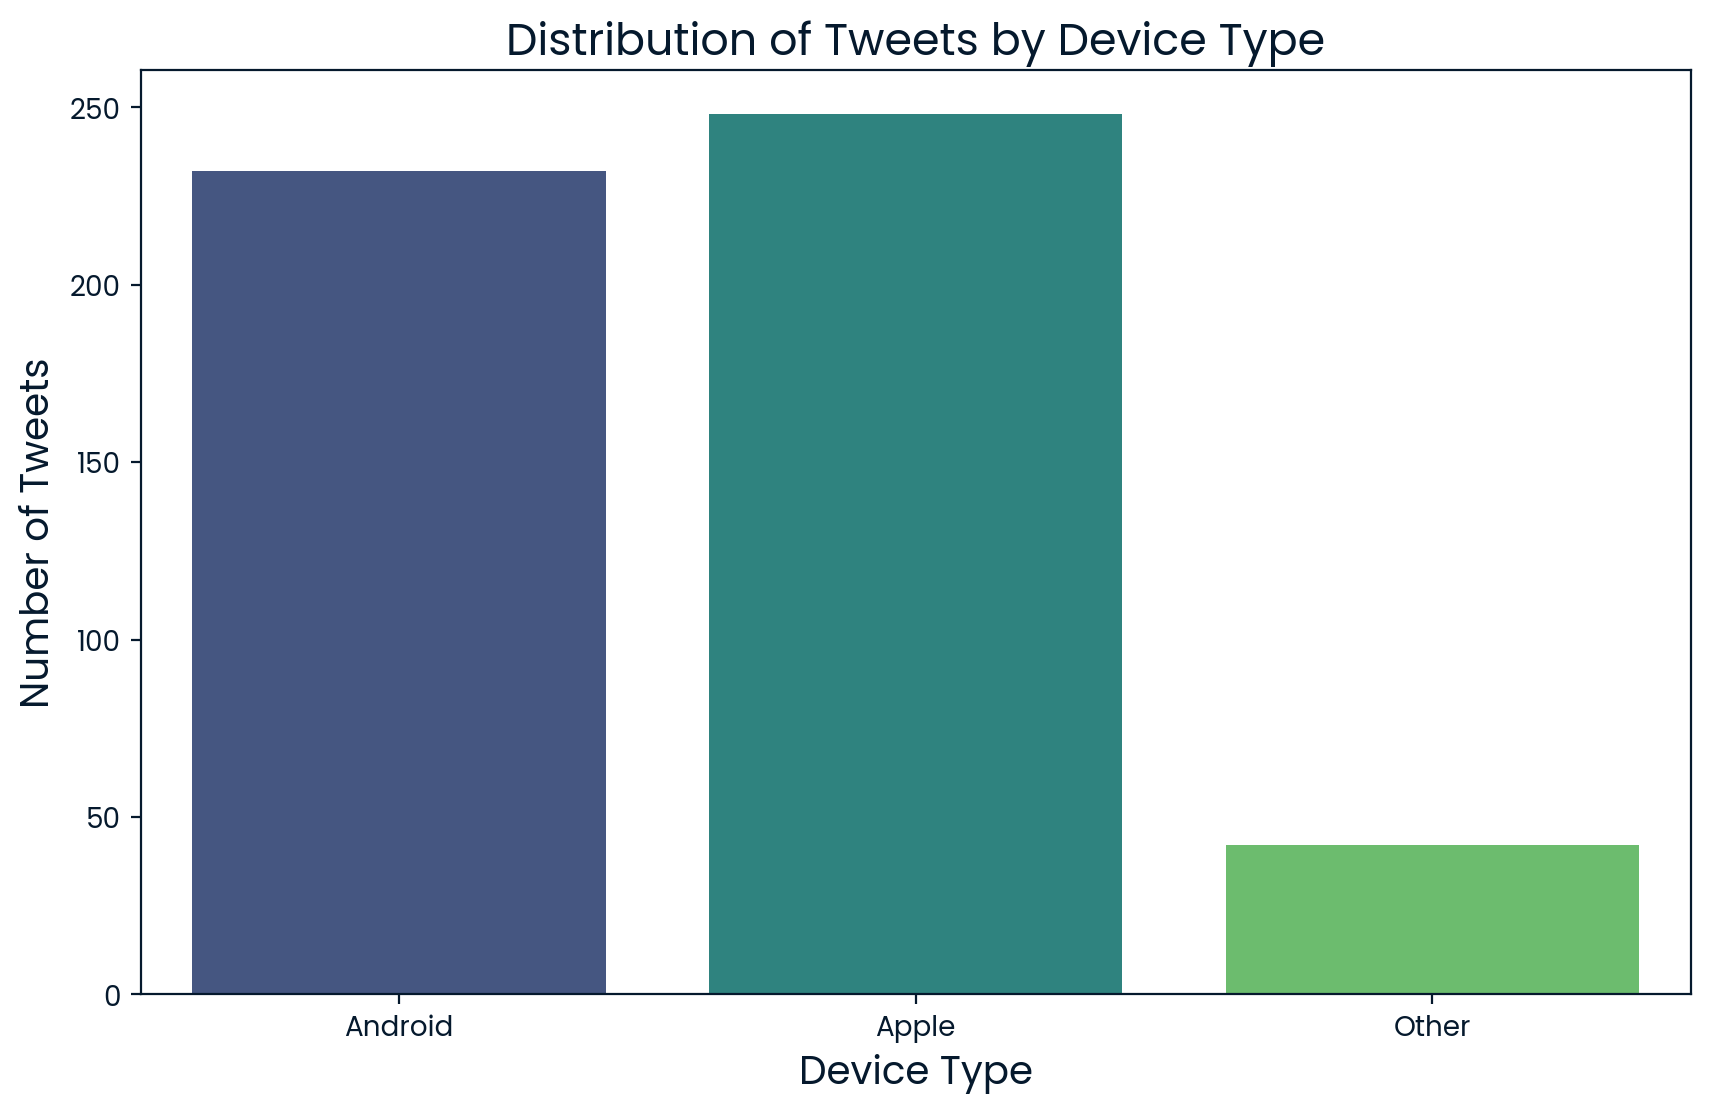

In [19]:
# Compare the tweet counts by device type
sources = [tweet['source'] for tweet in tweets]

def device(source):
    if re.search(r'iPhone|iPad', source, re.IGNORECASE):
        return 'Apple'
    elif re.search(r'Android', source, re.IGNORECASE):
        return 'Android'
    else:
        return 'Other'

devices = [device(source) for source in sources]


device_counts = Counter(devices)

# Visualize the data
device_df = pd.DataFrame.from_dict(device_counts, orient='index').reset_index()
device_df.columns = ['Device', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Device', y='Count', data=device_df, palette='viridis')
plt.title('Distribution of Tweets by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.show()